In [9]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import *
from src.kernels import Kernel

import warnings
warnings.filterwarnings('ignore')

In [2]:
T = 1000
d = 2
X = np.zeros((T,d))

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)
epsilon = np.random.normal(size=(T))

m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

t = 2
while t <= T-1 :
    X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
    X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
    X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
    t += 1

In [3]:
uniform_kernel = Kernel(T=T, bandwith=0.01, space_kernel="uniform", time_kernel="uniform")
uniform_weights_X = uniform_kernel.fit(X)
uniform_weights_ = uniform_weights_X.sum(axis=0)

KeyboardInterrupt: 

In [ ]:
epanechnikov_kernel = Kernel(T=T, bandwith=0.5, space_kernel="uniform", time_kernel="uniform")
epanechnikov_weights_X = epanechnikov_kernel.fit(X)
epanechnikov_weights_ = epanechnikov_weights_X.sum(axis=0)

In [ ]:
gaussian_kernel = Kernel(T=T, bandwith=0.5, space_kernel="gaussian", time_kernel="gaussian")
gaussian_weights_X = gaussian_kernel.fit(X)
gaussian_weights_ = gaussian_weights_X.sum(axis=0)

In [ ]:
silverman_kernel = Kernel(T=T, bandwith=0.01, space_kernel="silverman", time_kernel="silverman")
silverman_weights_X = silverman_kernel.fit(X)
silverman_weights_ = silverman_weights_X.sum(axis=0)

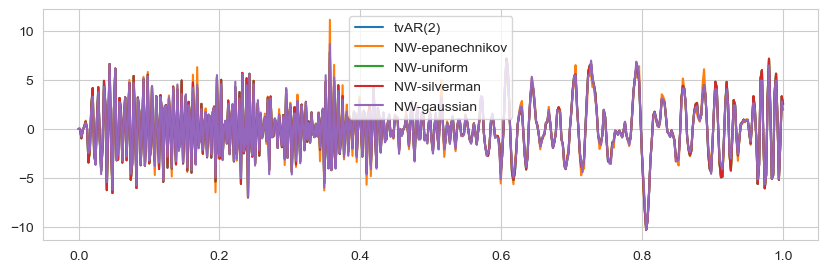

In [41]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(u_var, X_tvar_2, label='tvAR(2)')
# plt.plot(u_var, X_tvar_2_mean, label='tvAR(2)(mean)')
plt.plot(u_var, epanechnikov_weights_ * X_tvar_2, label='NW-epanechnikov')
plt.plot(u_var, uniform_weights_ * X_tvar_2, label='NW-uniform')
plt.plot(u_var, silverman_weights_ * X_tvar_2, label='NW-silverman')
plt.plot(u_var, gaussian_weights_ * X_tvar_2, label='NW-gaussian')
plt.legend()
plt.show()

In [42]:
gaussian_weights_

array([0.82158887, 0.82336836, 0.8251433 , 0.68351451, 0.70961523,
       0.82272779, 0.77946369, 0.72372488, 0.99104724, 0.888617  ,
       0.79233221, 0.81857503, 1.03975682, 0.81319707, 0.88189595,
       0.93939293, 1.07781638, 0.84015908, 0.8765134 , 1.07510048,
       0.86948053, 0.83237257, 0.99803615, 0.98116154, 0.94859653,
       0.97413605, 0.99570464, 0.98692567, 0.79992469, 0.86863786,
       0.86927378, 0.95243323, 1.06367312, 0.99602189, 0.88749432,
       0.84686401, 1.00448795, 0.88660882, 0.96928024, 0.87244974,
       0.84274802, 0.95538572, 0.95998847, 0.98688235, 0.97706879,
       0.97138112, 1.01432979, 1.00422496, 1.04306776, 0.9688602 ,
       0.91974131, 0.99855053, 0.99426611, 0.84321424, 1.13943067,
       0.98555738, 1.01480233, 0.83954468, 0.94767071, 1.07763598,
       0.9719087 , 1.08830982, 0.96762809, 0.71927936, 1.05446163,
       1.16552778, 0.97827996, 0.96809472, 1.01835114, 0.91017536,
       1.12172778, 1.16369405, 0.95618998, 0.72330998, 0.96829

In [43]:
uniform_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [44]:
epanechnikov_weights_

array([0.87777778, 0.87777778, 0.87777778, 0.51630216, 0.49090909,
       1.12777778, 0.63095238, 0.6       , 1.25      , 1.        ,
       0.97619048, 1.        , 1.        , 1.        , 0.85238095,
       1.        , 0.91666667, 0.75      , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.15      , 0.97738095, 0.83333333,
       1.        , 1.06309524, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.7       , 1.05      , 1.        , 1.45      , 1.05      ,
       1.        , 0.7       , 1.        , 1.        , 1.41666667,
       0.75      , 1.        , 0.75      , 0.91666667, 0.91666667,
       1.        , 1.        , 1.        , 0.64285714, 1.11666667,
       1.41666667, 1.2       , 1.        , 1.25      , 1.        ,
       1.08333333, 1.        , 1.        , 0.7       , 1.     

In [45]:
X_tvar_2_norm = scp.stats.norm.cdf(X_tvar_2)


<Axes: >

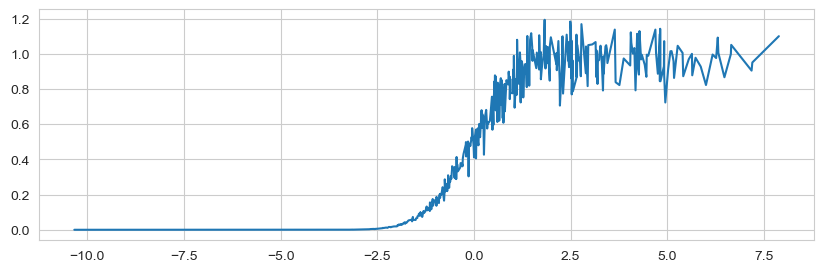

In [46]:
import seaborn as sns 
sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*gaussian_weights_)
# sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*epanechnikov_weights_)

In [47]:
# X_

In [48]:
X_tvar_2_norm * gaussian_weights_

array([4.10794434e-01, 4.11684178e-01, 1.36530467e-01, 3.03547449e-01,
       4.26672711e-01, 6.35305470e-01, 4.05674958e-01, 2.05369434e-04,
       1.63208565e-02, 8.79087632e-01, 7.92320449e-01, 3.98828190e-03,
       1.98293247e-04, 6.93761535e-01, 8.81887075e-01, 1.23943624e-01,
       8.95555858e-06, 1.93659045e-02, 8.76513013e-01, 1.06761410e+00,
       1.51134880e-10, 5.68570054e-01, 9.98036149e-01, 5.58874418e-02,
       2.36460952e-11, 9.44502274e-01, 9.95704635e-01, 6.27809685e-04,
       6.87302887e-04, 8.67956827e-01, 8.47448205e-01, 2.69392403e-04,
       8.49985023e-01, 9.95425095e-01, 5.70314926e-04, 7.49856417e-01,
       1.00448669e+00, 8.55837729e-08, 1.66257919e-04, 8.72449715e-01,
       6.12572257e-01, 6.66152816e-10, 9.59335534e-01, 9.49087402e-01,
       9.61022397e-05, 4.80954911e-01, 1.01432959e+00, 7.68071795e-05,
       4.65198417e-01, 9.68860183e-01, 1.85822423e-04, 9.00157603e-03,
       9.94259016e-01, 1.06541104e-01, 4.79078110e-04, 9.85160783e-01,
      

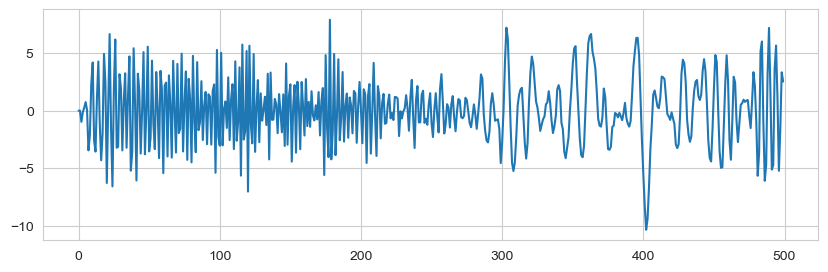

In [49]:
plt.plot(X_tvar_2)

In [3]:
T = 1000
n_replications = 200
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

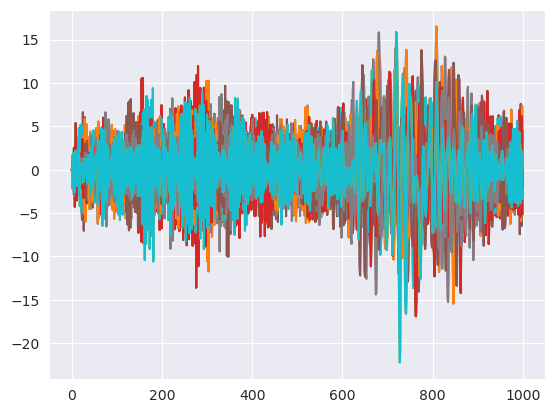

In [4]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    plt.plot(X_tvar_2_replications[replication])

In [5]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [6]:
t = [100, 200, 300, 400, 500]
X_tvar_2_100 = []
X_tvar_2_200 = []
X_tvar_2_300 = []
for replication in range(n_replications):
    X_tvar_2_100.append(X_tvar_2_replications[replication][99])
    X_tvar_2_200.append(X_tvar_2_replications[replication][199])
    X_tvar_2_300.append(X_tvar_2_replications[replication][299])

In [54]:
X_tvar_2_replications.shape

(100, 500)

In [7]:
X_tvar_2_100 = np.array(X_tvar_2_100)
X_tvar_2_200 = np.array(X_tvar_2_200)
X_tvar_2_300 = np.array(X_tvar_2_300)

In [56]:
# X_tvar_2_100

<Axes: >

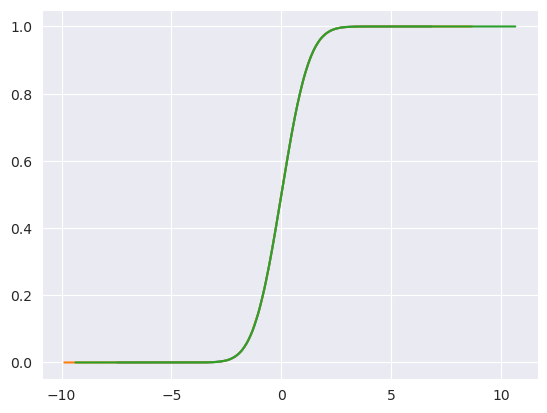

In [11]:
import scipy
import seaborn as sns
norm_X_tvar_2_100 = scipy.stats.norm.cdf(X_tvar_2_100)
norm_X_tvar_2_200 = scipy.stats.norm.cdf(X_tvar_2_200)
norm_X_tvar_2_300 = scipy.stats.norm.cdf(X_tvar_2_300)

sns.lineplot(x=X_tvar_2_100, y=norm_X_tvar_2_100)
sns.lineplot(x=X_tvar_2_200, y=norm_X_tvar_2_200)
sns.lineplot(x=X_tvar_2_300, y=norm_X_tvar_2_300)

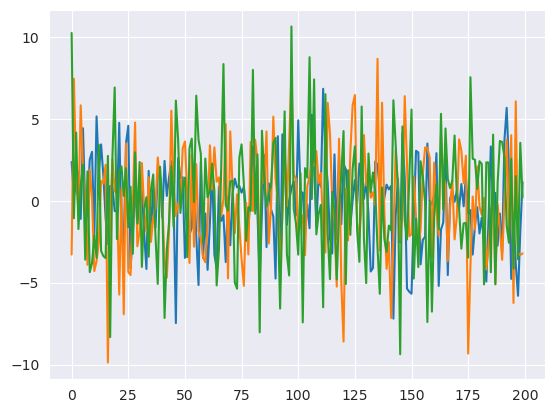

In [12]:
plt.plot(X_tvar_2_100)
plt.plot(X_tvar_2_200)
plt.plot(X_tvar_2_300)

In [59]:
d

2

bandwith = T**(0.4 / (2*(d+1))
epanechnikov_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gauss", time_kernel="mepanechnikov")

epanechnikov_weights = {}
epanechnikov_weights_ = {}
for replication in range(n_replications):
    epanechnikov_weights[str(replication)] = epanechnikov_kernel.fit(X_dict[str(replication)])
    epanechnikov_weights_[str(replication)] = epanechnikov_weights[str(replication)].sum(axis=0)

In [ ]:
X_dict.keys()

In [ ]:
epanechnikov_weights["1"].shape, epanechnikov_weights_["1"].shape

In [ ]:
X_tvar_2_norm = scp.stats.norm.cdf(X_tvar_2)
sns.lineplot(x=X_tvar_2, y=X_tvar_2_norm*gaussian_weights_)

In [ ]:
epanechnikov_weights["0"]

In [ ]:
weights_100 = {}
weights_200 = {}
weights_300 = {}
for replication in range(n_replications):
    weights_100[str(replication)] = epanechnikov_weights[str(replication)][99]# 500 x 500
    weights_200[str(replication)] = epanechnikov_weights[str(replication)][199]
    weights_300[str(replication)] = epanechnikov_weights[str(replication)][299]

In [ ]:
weights_100['0'].shape

In [ ]:
plt.plot(weights_100['0'])

In [ ]:
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm*weights_100['0'])

In [ ]:
X_tvar_2_100.shape

In [ ]:
X_tvar_2_100.shape

In [ ]:
weights_100['0'].shape

In [ ]:
X_tvar_2_replications.shape

In [ ]:
weights_100['1'].shape

In [ ]:
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
cdf_100 = X_tvar_2_replications

sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm)

In [ ]:
X_tvar_2_replications[0].shape

In [ ]:
for replication in range(1):
    print(replication)
    norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    sns.lineplot(x=X_tvar_2_replications[replication], y=norm*weights_100[str(replication)], label= str(replication))
    
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm, label="200" )
plt.legend()
plt.show()

In [ ]:
weights_100[str(replication)]

# Gausian weights 

In [15]:
T, n_replications

(1000, 200)

In [13]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)])
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [16]:
weights_100 = {}
weights_200 = {}
weights_300 = {}
for replication in range(n_replications):
    weights_100[str(replication)] = gaussian_weights[str(replication)] 
    weights_200[str(replication)] = gaussian_weights[str(replication)]
    weights_300[str(replication)] = gaussian_weights[str(replication)]


In [17]:
weights_100['0'].shape

(1000, 1000)

In [64]:
import pandas as pd
df_weights = pd.DataFrame(weights_100['0'])
df_weights.head(10)
# plt.plot(weights_100['1'])

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.042089,0.042088,0.042088,0.031631,0.006983,0.008985,1.124671e-03,9.329065e-04,0.005279,3.272304e-04,...,0.011255,0.011635,0.011664,1.578662e-04,9.442127e-06,2.252572e-05,5.099280e-07,6.094353e-08,1.679486e-13,5.022102e-11
1,0.042007,0.042008,0.042007,0.031571,0.006970,0.008968,1.122562e-03,9.311656e-04,0.005269,3.266257e-04,...,0.011284,0.011665,0.011694,1.582747e-04,9.466645e-06,2.258442e-05,5.112615e-07,6.110347e-08,1.683909e-13,5.035374e-11
2,0.041926,0.041927,0.041927,0.031511,0.006957,0.008951,1.120455e-03,9.294259e-04,0.005260,3.260215e-04,...,0.011312,0.011695,0.011725,1.586839e-04,9.491207e-06,2.264322e-05,5.125974e-07,6.126369e-08,1.688340e-13,5.048670e-11
3,0.032454,0.032455,0.032455,0.043184,0.001448,0.008427,6.569668e-03,1.188361e-03,0.000950,3.961939e-05,...,0.009939,0.005864,0.008391,1.181141e-03,4.439259e-05,2.322054e-06,2.557764e-08,6.129060e-07,1.454479e-11,4.298394e-11
4,0.008363,0.008363,0.008363,0.001690,0.050404,0.000306,2.581977e-06,4.428850e-04,0.049307,1.072355e-03,...,0.002793,0.007295,0.001842,1.629628e-07,2.951338e-07,2.893425e-03,7.528537e-06,2.222531e-12,8.684662e-18,9.140507e-10
5,0.012866,0.012867,0.012867,0.011761,0.000366,0.060270,4.387555e-04,3.217965e-06,0.000309,1.509868e-03,...,0.001202,0.002363,0.009723,1.295230e-04,3.026514e-08,5.679187e-08,6.569197e-06,2.529919e-05,7.400451e-16,3.218242e-16
6,0.001671,0.001671,0.001671,0.009512,0.000003,0.000455,6.252341e-02,4.389917e-04,0.000001,1.113492e-08,...,0.000836,0.000104,0.000305,1.878909e-02,4.829084e-04,1.292599e-09,6.151526e-13,8.309415e-06,2.903977e-07,1.417246e-11
7,0.001237,0.001238,0.001238,0.001536,0.000491,0.000003,3.919883e-04,5.582894e-02,0.000256,1.086004e-08,...,0.002124,0.000370,0.000069,2.596685e-05,4.160898e-03,6.670068e-05,1.054993e-12,1.032837e-12,2.729238e-09,2.916442e-05
8,0.006402,0.006403,0.006403,0.001122,0.049931,0.000262,1.166330e-06,2.340306e-04,0.051041,1.554098e-03,...,0.001991,0.006249,0.001546,7.313174e-08,1.118590e-07,3.003116e-03,1.487285e-05,1.280964e-12,1.537879e-18,3.932092e-10
9,0.000593,0.000593,0.000593,0.000070,0.001624,0.001912,1.359115e-08,1.484512e-08,0.002324,7.631532e-02,...,0.000032,0.000519,0.000686,1.891486e-09,1.304637e-12,2.429578e-06,9.617969e-03,2.484817e-10,8.649294e-25,3.384024e-18


In [65]:
# df_weights.sum(axis=0)

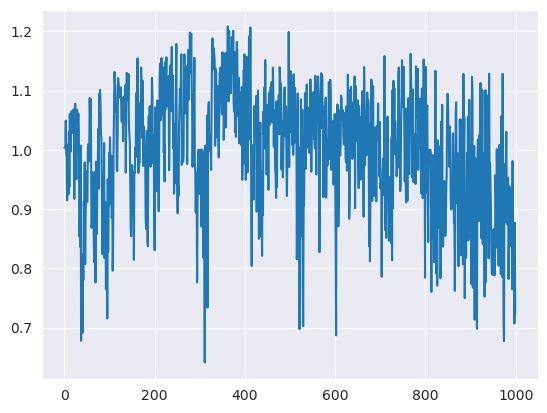

In [18]:
plt.plot(gaussian_weights_['0'])

In [70]:
replicated_NW_cdfs_100 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)].sum(0)* X_tvar_2_replication_norm # [99] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [71]:
weights_100['0'].shape

(500, 500)

In [72]:
replicated_NW_cdfs_100['0'].shape

(500,)

<Axes: >

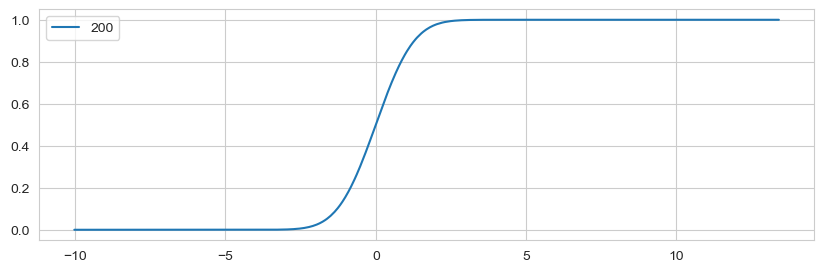

In [73]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label="200" )

In [74]:
# replicated_NW_cdfs_100

In [19]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(200, 1000) (200, 1000)


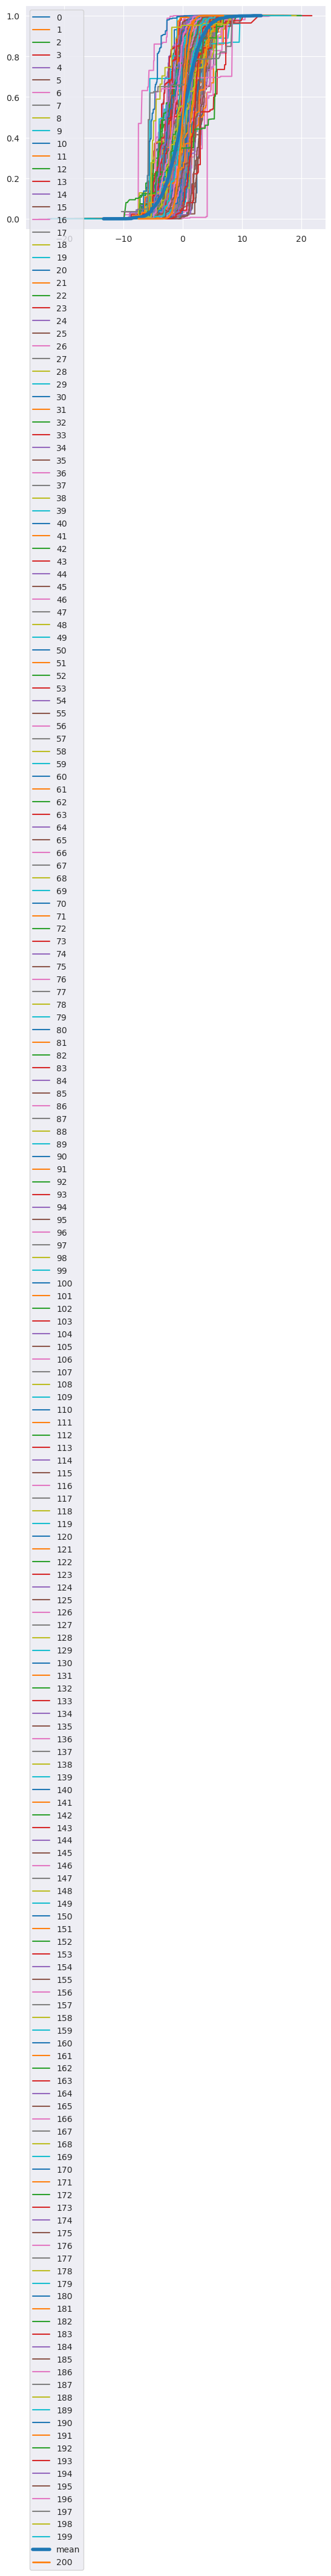

In [24]:
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
   y, x = eval_univariate(X_tvar_2_replications[replication], weights_100[str(replication)][99])
   x_rep[replication] = x
   y_rep[replication] = y
   
   
   plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm, label="200", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

In [25]:
y_mean_pi_NW_cdfs_100.shape

NameError: name 'y_mean_pi_NW_cdfs_100' is not defined

In [26]:
x_mean_pi_NW_cdfs_100 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_100 = y_rep.mean(axis=0)

In [27]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_100, X_tvar_2_100_norm)

0.10895931063761222

In [ ]:
## T: 500 0.15288611513088618


In [28]:
1 / (T**.5 *bandwith**(d+1))  + bandwith

0.75684988565961

In [ ]:

X_tvar_2_100_norm = scp.stats.norm.cdf(X_tvar_2_100)
sns.lineplot(x=X_tvar_2_100, y=X_tvar_2_100_norm, label="200" )
plt.legend()
plt.show()